# Exploratory Data Analysis

### Load Cleansed Wine Reviews

See [data preparation](wine_review-data_preparation.ipynb) for details on the prepared dataset.

Libraries

In [ ]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import plotly.express as px

In [ ]:
wine_df = pd.read_parquet('data/wine/wine_review.parquet.gzip')
wine_df.info()
wine_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 100538 entries, 0 to 129970
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   country         100538 non-null  object 
 1   description     100538 non-null  object 
 2   points          100538 non-null  int64  
 3   price           93522 non-null   float64
 4   taster_name     100538 non-null  object 
 5   title           100538 non-null  object 
 6   variety         100538 non-null  object 
 7   winery          100538 non-null  object 
 8   year            100538 non-null  int64  
 9   wine_style      100538 non-null  object 
 10  type            100538 non-null  object 
 11  quality         100538 non-null  object 
 12  classification  100538 non-null  object 
 13  location        100538 non-null  object 
 14  band            93522 non-null   object 
dtypes: float64(1), int64(2), object(12)
memory usage: 12.3+ MB


,country,description,points,price,taster_name,title,variety,winery,year,wine_style,type,quality,classification,location,band
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,Kerin O’Keefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,2013,light_white,white,medium,Old World,Etna,None
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2011,medium_red,red,medium,Old World,Douro,popular
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013,light_white,white,medium,New World,Oregon,popular
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013,aromatic_white,white,medium,New World,Michigan,popular
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012,light_red,red,medium,New World,Oregon,luxury


In [128]:
wine_df.nunique()

country               15
description       100517
points                21
price                370
taster_name           20
title             100101
variety               50
winery             14982
year                  18
wine_style             9
type                   5
quality                2
classification         2
location             569
band                   8
dtype: int64

## Univariate Analysis

### Points

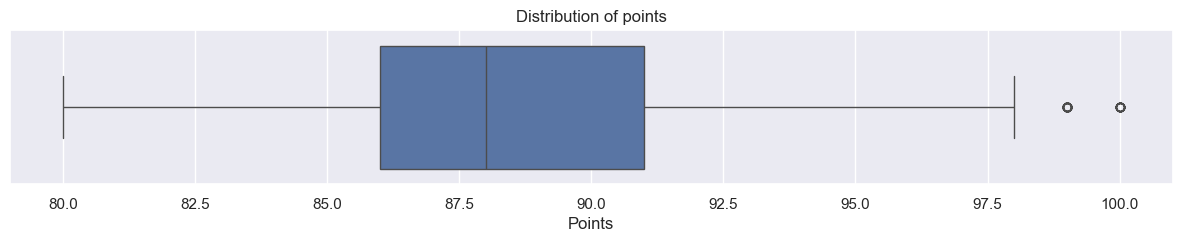

In [129]:
# box plot of points
fig, ax = plt.subplots(figsize=(15, 2))
ax = sns.boxplot(wine_df, x='points', orient='h')
ax.set_title('Distribution of points')
ax.set_xlabel('Points')
plt.show()

### Quality

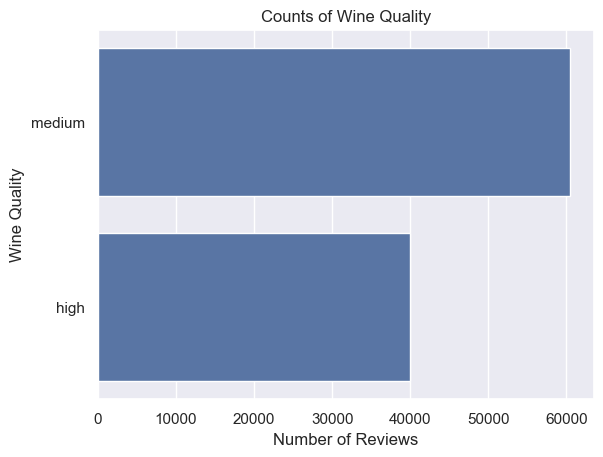

In [130]:
sns.barplot(wine_df.quality.value_counts().sort_values(ascending=False).reset_index(), x='count', y='quality')
plt.title('Counts of Wine Quality')
plt.xlabel('Number of Reviews')
plt.ylabel('Wine Quality')
plt.show()

### Price

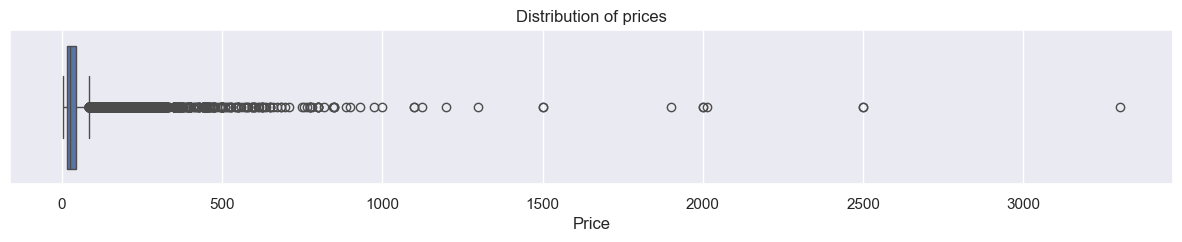

In [131]:
# box plot of price
fig, ax = plt.subplots(figsize=(15, 2))
ax = sns.boxplot(wine_df, x='price', orient='h')
ax.set_title('Distribution of prices')
ax.set_xlabel('Price')
plt.show()

### Price Band

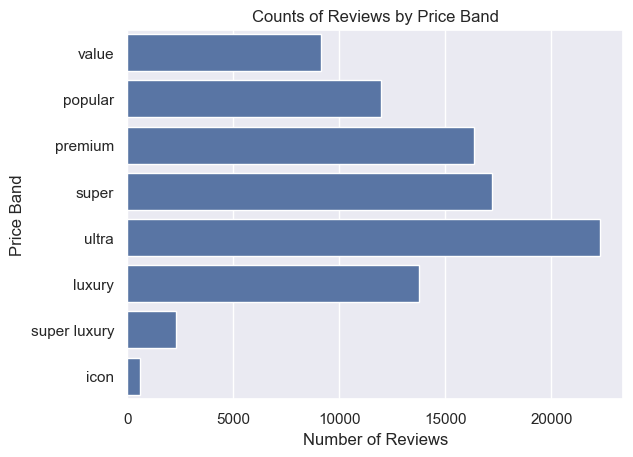

In [132]:
sns.barplot(wine_df['band'].value_counts(), orient='h', order=['value', 'popular', 'premium', 'super', 'ultra', 'luxury', 'super luxury', 'icon'])
plt.title('Counts of Reviews by Price Band')
plt.xlabel('Number of Reviews')
plt.ylabel('Price Band')
plt.show()

### Year

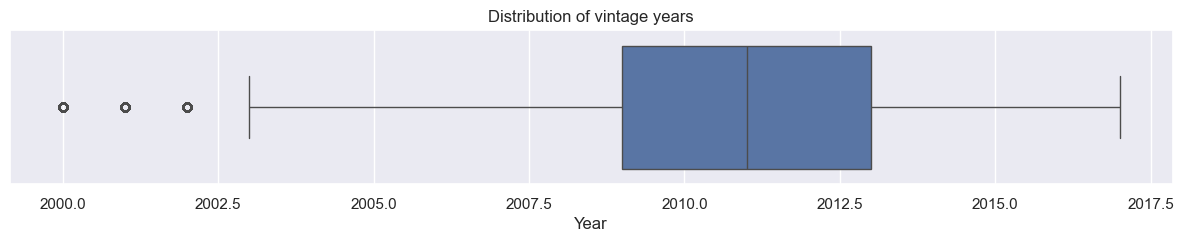

In [133]:
fig, ax = plt.subplots(figsize=(15, 2))
ax = sns.boxplot(wine_df, x='year', orient='h')
ax.set_title('Distribution of vintage years')
ax.set_xlabel('Year')
plt.show()

In [134]:
wine_df.year.describe()

count    100538.000000
mean       2010.756162
std           3.264153
min        2000.000000
25%        2009.000000
50%        2011.000000
75%        2013.000000
max        2017.000000
Name: year, dtype: float64

### Variety

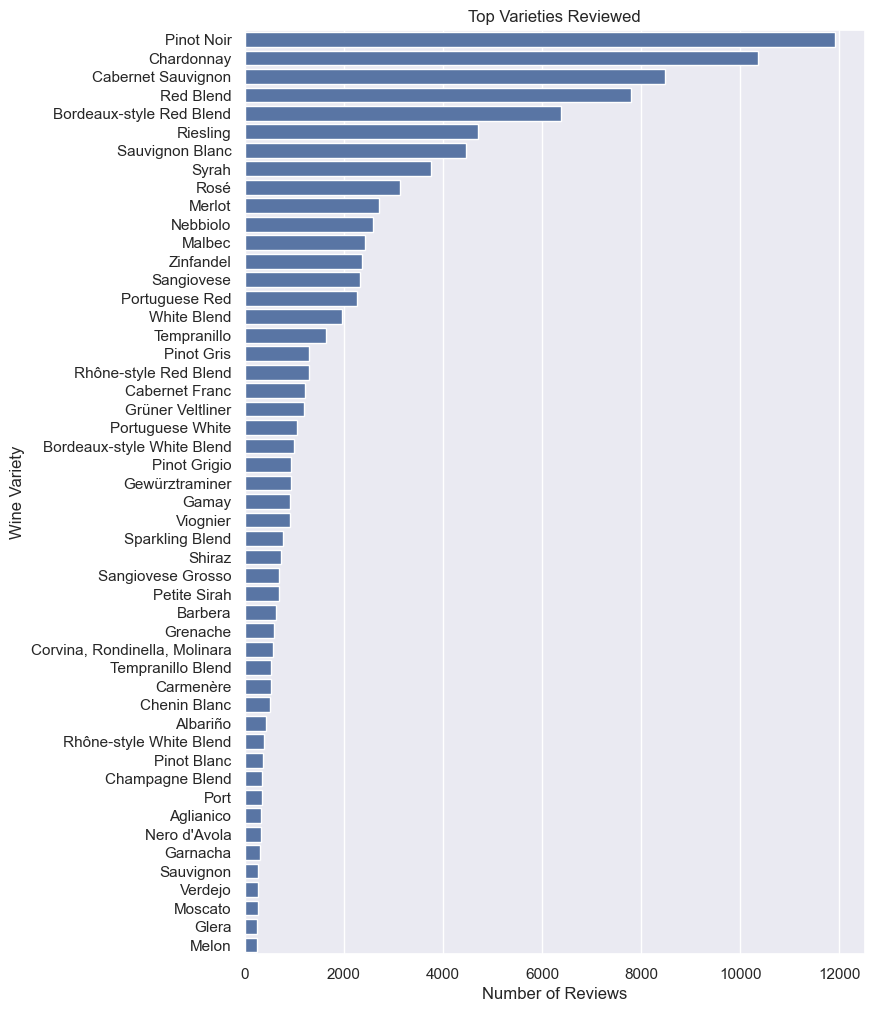

In [135]:
fig, ax = plt.subplots(figsize=(8, 12))
sns.barplot(wine_df.variety.value_counts().sort_values(ascending=False).reset_index(), x='count', y='variety')
ax.set_title('Top Varieties Reviewed')
ax.set_xlabel('Number of Reviews')
ax.set_ylabel('Wine Variety')
plt.show()

### Style

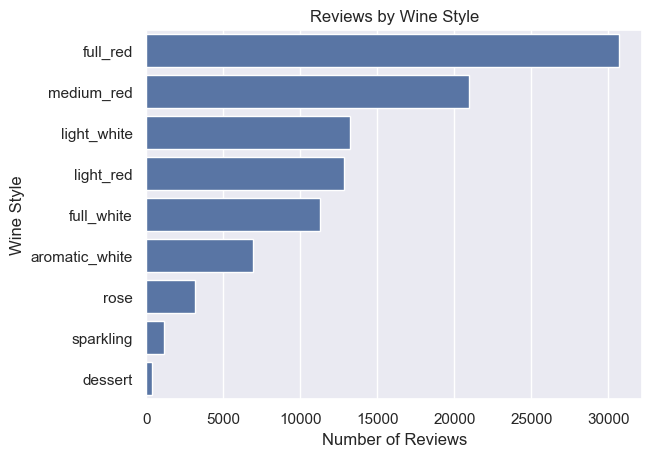

In [136]:
# fig, ax = plt.subplots(figsize=(8, 10))
sns.barplot(wine_df.wine_style.value_counts().sort_values(ascending=False).reset_index(), x='count', y='wine_style')
plt.title('Reviews by Wine Style')
plt.xlabel('Number of Reviews')
plt.ylabel('Wine Style')
plt.show()

### Type

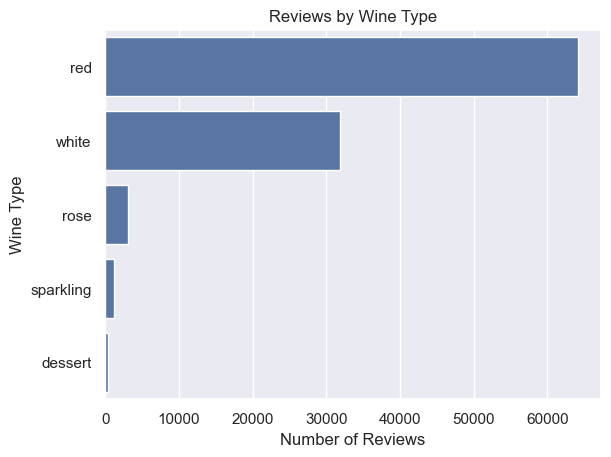

In [137]:
# fig, ax = plt.subplots(figsize=(8, 10))
sns.barplot(wine_df.type.value_counts().sort_values(ascending=False).reset_index(), x='count', y='type')
plt.title('Reviews by Wine Type')
plt.xlabel('Number of Reviews')
plt.ylabel('Wine Type')
plt.show()

### Country

In [138]:
reviews_by_country = wine_df.country.value_counts().reset_index().replace({'US':'United States of America'}).sort_values('count', ascending=False).set_index('country')
reviews_by_country

,count
country,
United States of America,45840
France,17692
Italy,13115
Spain,4226
Portugal,4033
Chile,3785
Argentina,2988
Austria,2183
Australia,1828


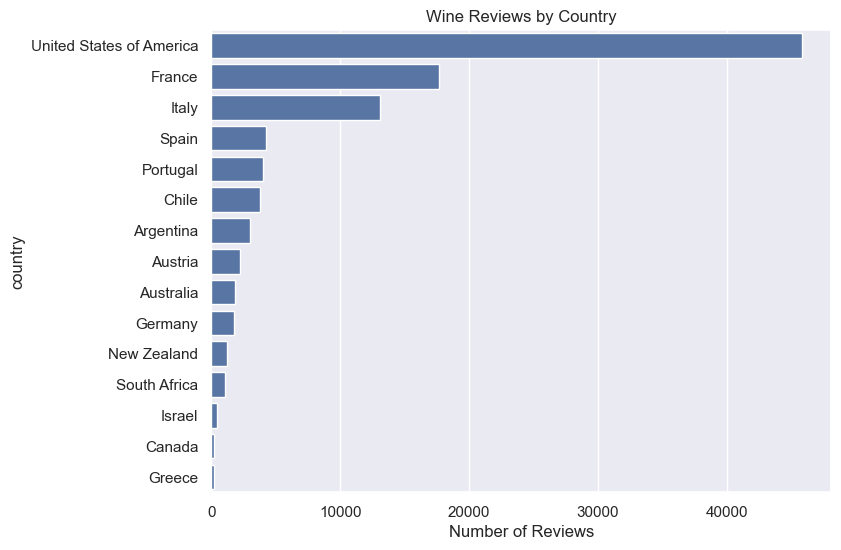

In [139]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(reviews_by_country, x='count', y='country')
ax.set_title('Wine Reviews by Country')
ax.set_xlabel('Number of Reviews')
plt.show()

In [140]:
import geopandas as gpd
from zipfile import ZipFile
from io import BytesIO
from urllib.request import urlopen

# Natural Earth download page
ne_base_url = 'https://naciscdn.org/naturalearth/10m/cultural'

# local directory for downloaded files
local_path = 'data'

# download the selected file from Natural Earth if it has not yet been downloaded
def ne_load(file, url=ne_base_url, path=local_path):
  target = os.path.join(path,file.replace('.zip', ''))

  # download the file if necessary
  if not os.path.exists(target):
    zipurl = url+file
    with urlopen(zipurl) as zipresp:
      with ZipFile(BytesIO(zipresp.read())) as zfile:
        zfile.extractall(target)
  
  # make sure the file exists
  assert os.path.exists(target)

  # return the file as a panda frame
  return gpd.read_file(target)


# the columns to load in the DataFrame
ne_cols = ['SOVEREIGNT', 'ADMIN', 'GEOUNIT', 'TYPE', 'NAME', 'NAME_LONG', 'ABBREV', 'FORMAL_EN', 'NAME_SORT', 'ISO_A2_EH', 'CONTINENT', 'SUBREGION', 'REGION_UN', 'geometry']

# helper to load countries shapes
load_countries = lambda path=local_path: ne_load('ne_10m_admin_0_map_units.zip', path)[ne_cols]

In [141]:
import contextily as cx

def plot_df(df, column=None, ax=None, alpha=0.5, crs=3857):
  "Plot based on the `geometry` column of a GeoPandas dataframe"
  df = df.copy()
  df.to_crs(epsg=crs)

  if ax is None:
    _, ax = plt.subplots(figsize=(8,8))
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  df.plot(
    ax=ax,
    alpha=alpha, edgecolor='k',
    column=column, # categorical=True,
    legend=True, #legend_kwds={'loc': 'upper left'},
    scheme='quantiles',
    figsize=(15,10),
    cmap='OrRd',
    missing_kwds={
      'color': 'lightgrey'
    }
  )
  
  # west, south, east, north = bbox = df.total_bounds
  # img, ext = cx.bounds2raster(west, south, east, north, 'world_watercolor.tif', ll=True)
  # cx.add_basemap(ax, crs=df.crs, source=cx.providers.CartoDB.Positron)

def plot_shape(shape, ax=None, crs=3857):
  df = gpd.GeoDataFrame({'geometry': [shape]}, crs='ESPG:4326')
  plot_df(df, ax=ax, crs=crs)

In [142]:
countries = load_countries()[['SOVEREIGNT', 'ADMIN', 'TYPE', 'GEOUNIT', 'NAME', 'NAME_LONG', 'FORMAL_EN', 'NAME_SORT', 'ISO_A2_EH', 'geometry']].set_index('GEOUNIT')
countries.head()

,SOVEREIGNT,ADMIN,TYPE,NAME,NAME_LONG,FORMAL_EN,NAME_SORT,ISO_A2_EH,geometry
GEOUNIT,,,,,,,,,
Indonesia,Indonesia,Indonesia,Sovereign country,Indonesia,Indonesia,Republic of Indonesia,Indonesia,ID,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
Malaysia,Malaysia,Malaysia,Sovereign country,Malaysia,Malaysia,Malaysia,Malaysia,MY,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
Chile,Chile,Chile,Sovereign country,Chile,Chile,Republic of Chile,Chile,CL,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
Bolivia,Bolivia,Bolivia,Sovereign country,Bolivia,Bolivia,Plurinational State of Bolivia,Bolivia,BO,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
Peru,Peru,Peru,Sovereign country,Peru,Peru,Republic of Peru,Peru,PE,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."


In [143]:
countries.loc[reviews_by_country.index, 'count'] = reviews_by_country['count']
# countries.loc[countries['count'].isna(), 'count'] = 0
countries.drop('Antarctica', inplace=True)
countries[['geometry', 'count']]

,geometry,count
GEOUNIT,,
Indonesia,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4...",NaN
Malaysia,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4...",NaN
Chile,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611...",3785.0
Bolivia,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5...",NaN
Peru,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832...",NaN
...,...,...
Palmyra Atoll,"POLYGON ((-162.06086 5.88719, -162.05761 5.882...",NaN
Kingman Reef,"POLYGON ((-162.40018 6.44514, -162.38528 6.445...",NaN
Bajo Nuevo Bank (Petrel Is.),"POLYGON ((-79.98929 15.79495, -79.98782 15.796...",NaN


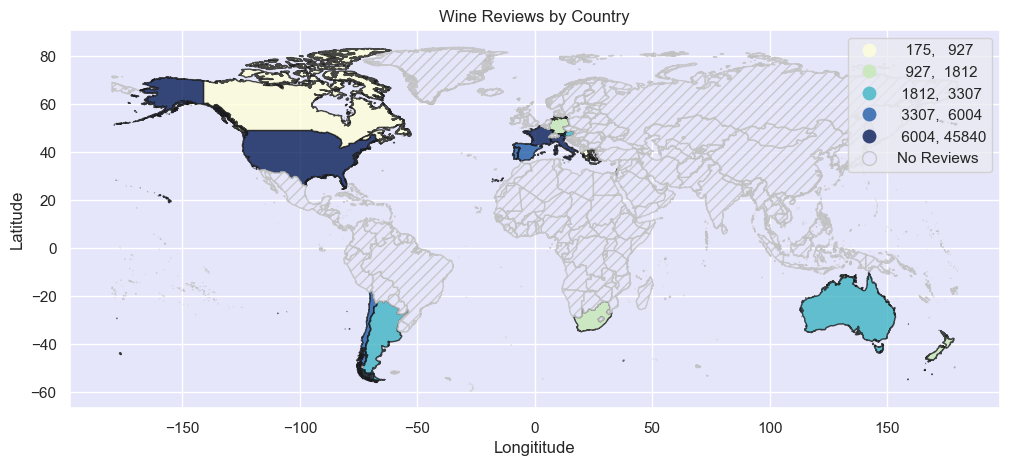

In [144]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LinearSegmentedColormap, Normalize

# cmap1 = plt.get_cmap('viridis')
# cmap2 = plt.get_cmap('cividis')
# c1 = cmap1(np.linspace(0,1,256))
# c2 = cmap2(np.linspace(0,1,256))
# ratio = 0.5
# cmap = LinearSegmentedColormap.from_list('blended_name', (1-ratio)*c1+ratio*c2)
# norm = Normalize(vmin=countries['count'].min(), vmax=countries['count'].max())

fig, ax = plt.subplots(1,1,figsize=(12,8),)
# divider = make_axes_locatable(ax)
# cax = divider.append_axes('right', size='5%', pad=.25)
countries.plot(
  column='count', # categorical=True,
  ax=ax, #cax=cax,
  alpha=.8, edgecolor='k',
  scheme = 'QUANTILES',
  legend=True, #legend_kwds={'label': 'Wine Reviews by Country', 'orientation': 'vertical'},
  legend_kwds={'fmt':'{:.0f}'},
  # scheme='quantiles',
  cmap='YlGnBu', #norm=norm,
  figsize=(10,6),
  # cmap=cmap,norm=norm,
  missing_kwds={ 'label':'No Reviews', 'color':'lavender', 'edgecolor':'silver', 'hatch':'///'},
  
)
plt.xlabel('Longititude')
plt.ylabel('Latitude')
plt.title('Wine Reviews by Country')
plt.grid(True)
# ax.set_facecolor((251/255,238/255,255/255))
ax.set_facecolor('lavender')
# cx.add_basemap(ax, crs=countries.crs, source=cx.providers.CartoDB.Positron)

### Old world vs New World Wine Classification

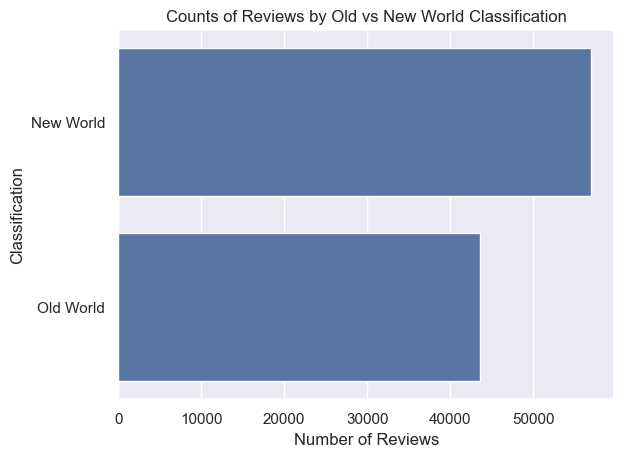

In [145]:
sns.barplot(wine_df.classification.value_counts(), orient='h')
plt.title('Counts of Reviews by Old vs New World Classification')
plt.xlabel('Number of Reviews')
plt.ylabel('Classification')
plt.show()

### Taster

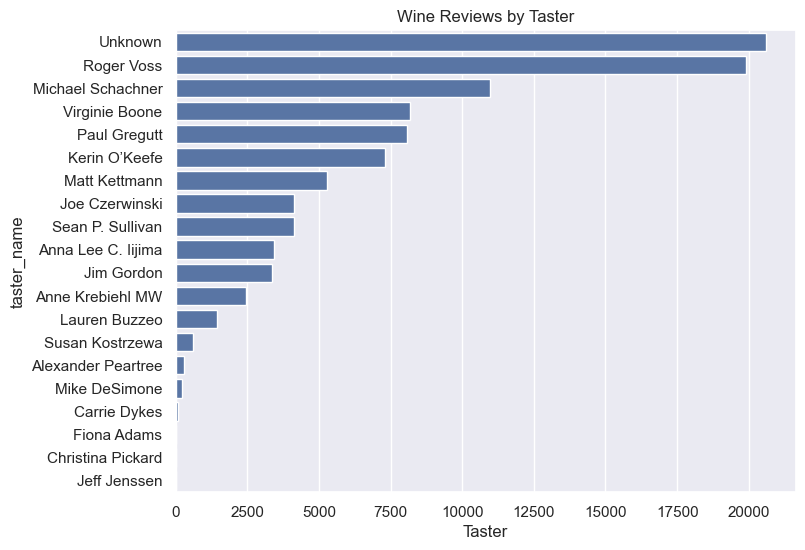

In [146]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(wine_df.taster_name.value_counts().sort_values(ascending=False).reset_index(), x='count', y='taster_name')
ax.set_title('Wine Reviews by Taster')
ax.set_xlabel('Number of Reviews')
ax.set_xlabel('Taster')
plt.show()

## Multivariate Analysis

### Feature Correlation

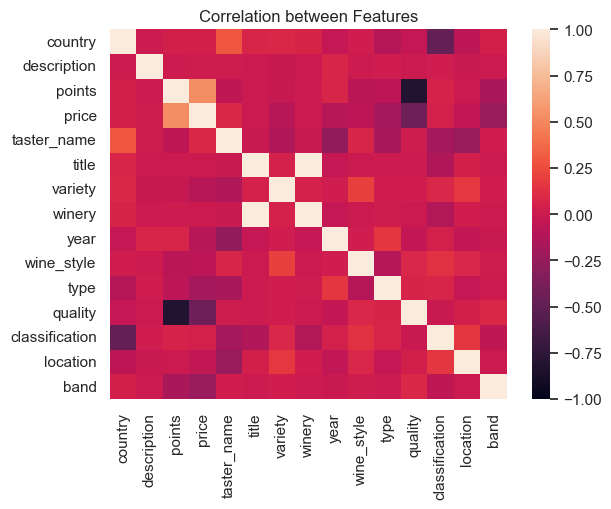

In [147]:
#make all columns categorical
selected_wine_data = pd.DataFrame({col: wine_df.dropna()[col].astype('category').cat.codes for col in wine_df.dropna()}, index=wine_df.dropna().index)

#create correlations and correlation heat map
corr= selected_wine_data.corr(method = 'pearson')
sns.heatmap(corr, vmin=-1, vmax=1)
plt.title("Correlation between Features", fontsize=12)
plt.show()

### Price-Point relationship

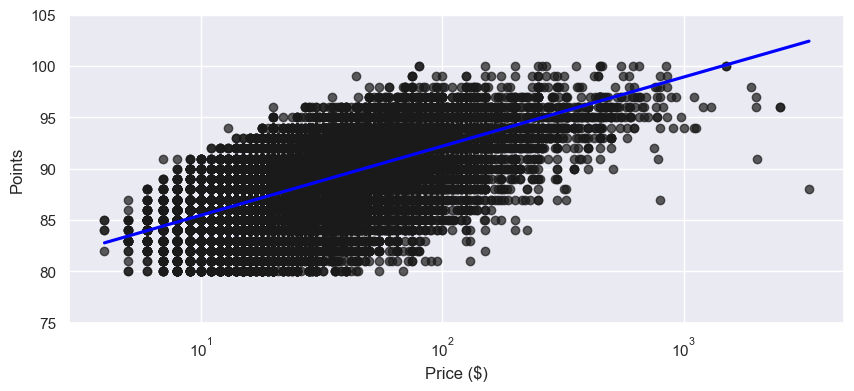

In [148]:
# relationship between points and price
plt.figure(figsize=(10,4))
sns.regplot(x='price', y='points', data=wine_df, color='k', logx=True, scatter_kws={'alpha':0.7}, line_kws={'color': 'blue'})
plt.ylabel("Points")
plt.xlabel("Price ($)")
plt.ylim((75, 105))
plt.xscale('log')

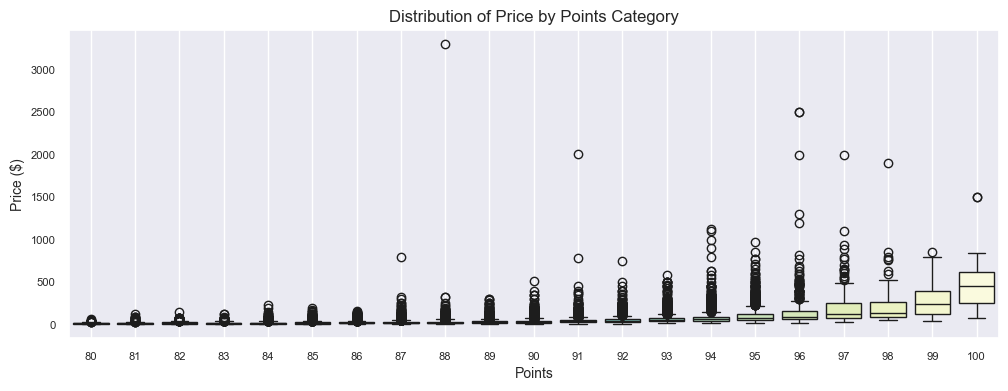

In [149]:
plt.figure(figsize=(12,4))
sns.boxplot(x = 'points', y = 'price', palette = 'YlGnBu_r', hue='points', data = wine_df, native_scale=False, legend=None)
plt.title("Distribution of Price by Points Category", fontsize=12)
plt.xlabel("Points",fontsize=10)
plt.ylabel("Price ($)",fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.grid()
plt.show()

### Price-Points-Year Relationship

In [150]:
wine_corr = wine_df.select_dtypes(np.number).corr()
wine_corr

,points,price,year
points,1.000000,0.415175,0.056715
price,0.415175,1.000000,-0.073364
year,0.056715,-0.073364,1.000000


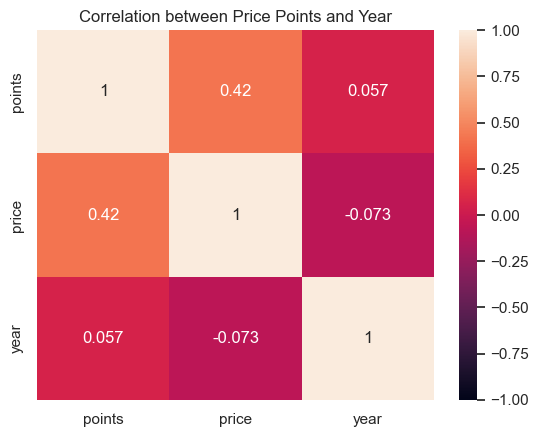

In [151]:
sns.heatmap(wine_corr, annot=True, vmin=-1.0, vmax=1.0)
plt.title("Correlation between Price Points and Year", fontsize=12)
plt.show()

There is a clear relationship between the points a wine gets, and the expected price for the wine. However the age of win appears to be weekly correlated to points or price.

### Taster-Point relationship

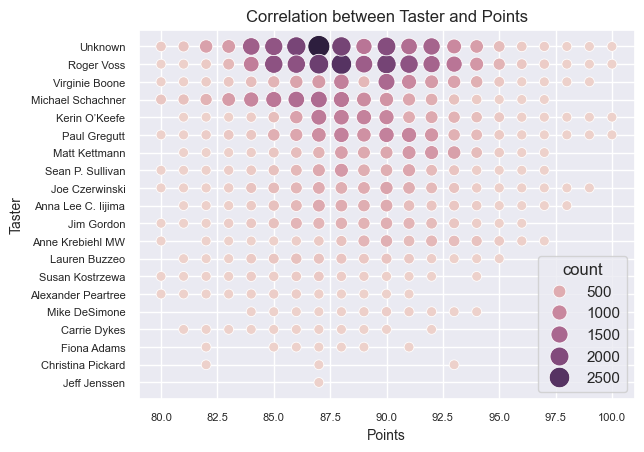

In [152]:
sns.scatterplot(
  wine_df.groupby(['taster_name', 'points'])[['title']].count().reset_index().rename(columns={'title': 'count'}).sort_values('count', ascending=False), 
  x='points', y='taster_name', size='count', hue='count', sizes=(50, 250),
)
plt.title("Correlation between Taster and Points", fontsize=12)
plt.xlabel("Points",fontsize=10)
plt.ylabel("Taster",fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

Most wines reviewed are mid-range between 85 and 90 points as expected. Most reviewers span broad range of points. Does not appear to be bias from reviewer.

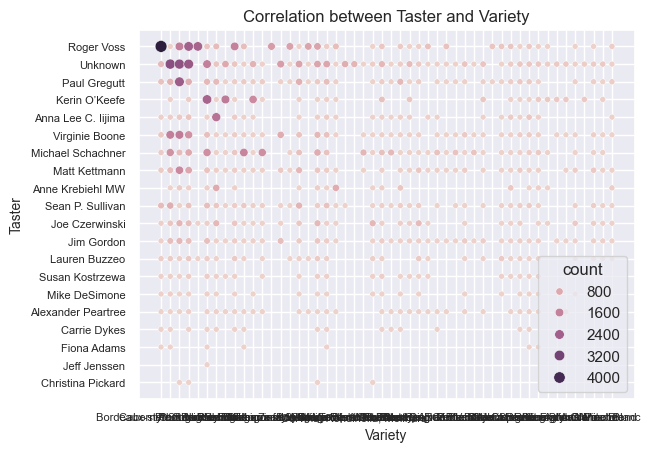

In [153]:
sns.scatterplot(wine_df.groupby(['taster_name', 'variety'])[['title']].count().reset_index().rename(columns={'title': 'count'}).sort_values('count', ascending=False), x='variety', y='taster_name', size='count', hue='count')
plt.title("Correlation between Taster and Variety", fontsize=12)
plt.xlabel("Variety",fontsize=10)
plt.ylabel("Taster",fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

### Country-Price-Point relationship

**Mean Price and Points vs total volume of reviews by country**

In [154]:
by_country_stats = wine_df.groupby('country')[['price', 'points']].mean().sort_index()
by_country_stats['count'] = wine_df.country.value_counts().sort_index().values
by_country_stats

,price,points,count
country,,,
Argentina,25.246274,86.745315,2988
Australia,35.851359,88.595186,1828
Austria,31.823690,90.373339,2183
Canada,33.643243,89.333333,186
Chile,20.604975,86.459181,3785
France,42.106180,88.883563,17692
Germany,43.848260,90.012856,1789
Greece,24.345029,87.080000,175
Israel,31.764858,88.493703,397


**Distribution of points by country and wine type**

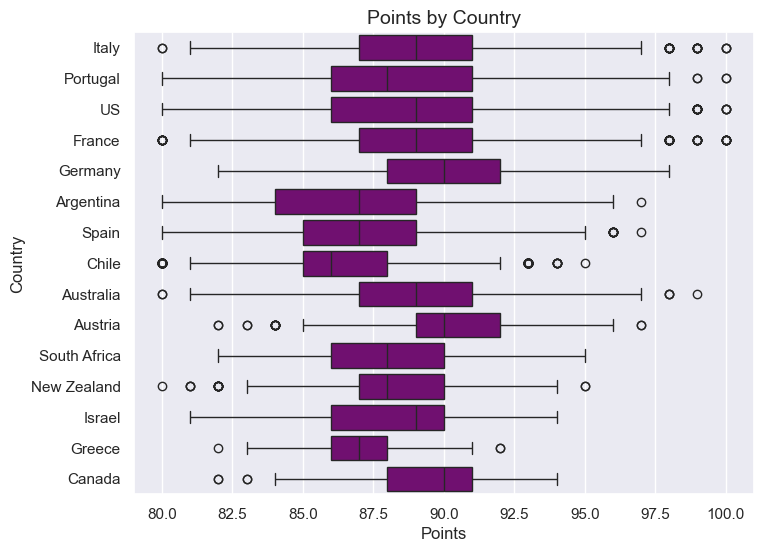

In [155]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=wine_df, x='points', y='country', color = 'Purple')
plt.title('Points by Country', fontsize = 14)
plt.xlabel('Points')
plt.ylabel('Country');

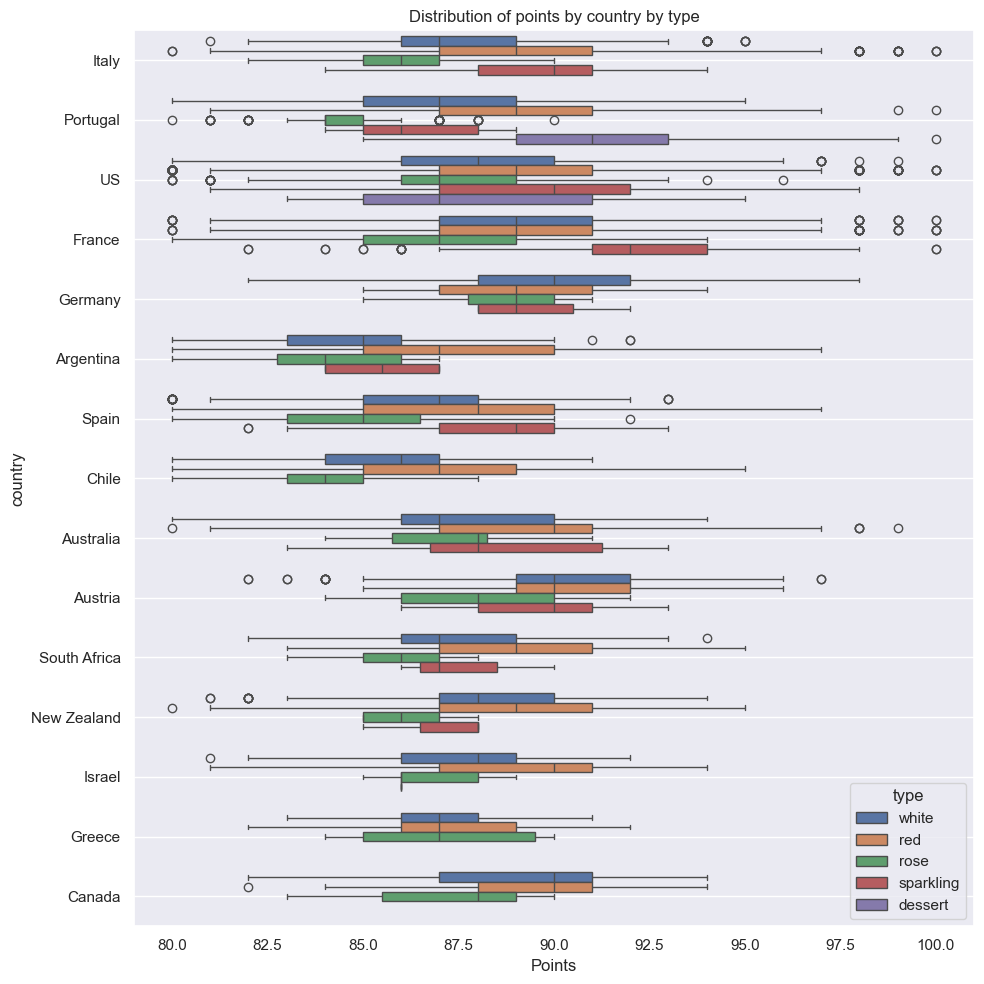

In [156]:
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.boxplot(wine_df, x='points', y='country', orient='h', native_scale=True, hue='type')
ax.set_title('Distribution of points by country by type')
ax.set_xlabel('Points')
plt.grid()
plt.tight_layout()
plt.show()

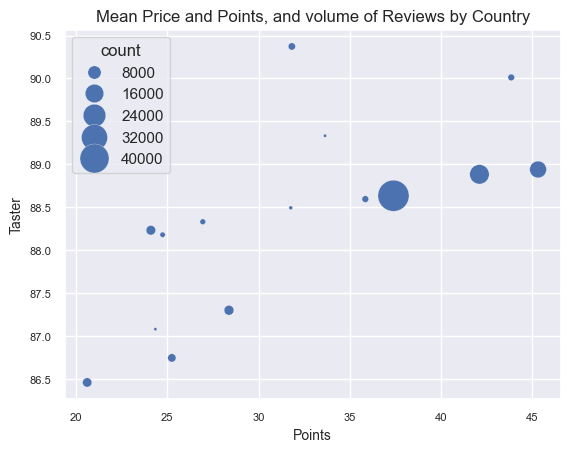

In [157]:
sns.scatterplot(by_country_stats.reset_index(), x='price', y='points', size='count', sizes=(5, 500))
plt.title("Mean Price and Points, and volume of Reviews by Country", fontsize=12)
plt.xlabel("Points",fontsize=10)
plt.ylabel("Taster",fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

# TODO: show country label value

**Country-Points-Price Relationship**

In [158]:
top_5_countries = wine_df.country.value_counts().sort_values(ascending=False).iloc[:5].index.to_numpy()
top_5_countries

array(['US', 'France', 'Italy', 'Spain', 'Portugal'], dtype=object)

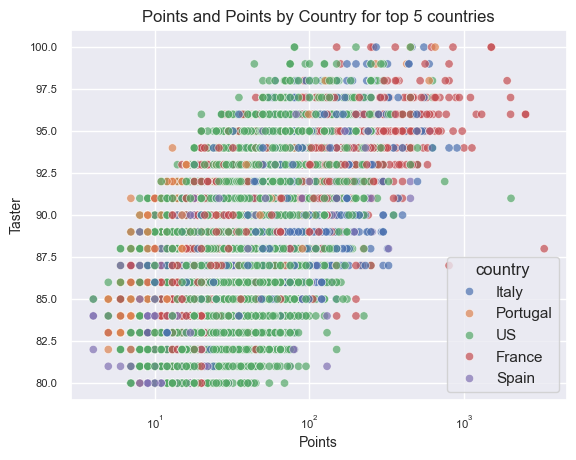

In [159]:
sns.scatterplot(wine_df[wine_df.country.isin(top_5_countries)], x='price', y='points', hue='country', alpha=0.7)
plt.title("Points and Points by Country for top 5 countries", fontsize=12)
plt.xlabel("Points",fontsize=10)
plt.ylabel("Taster",fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xscale('log')
plt.show()

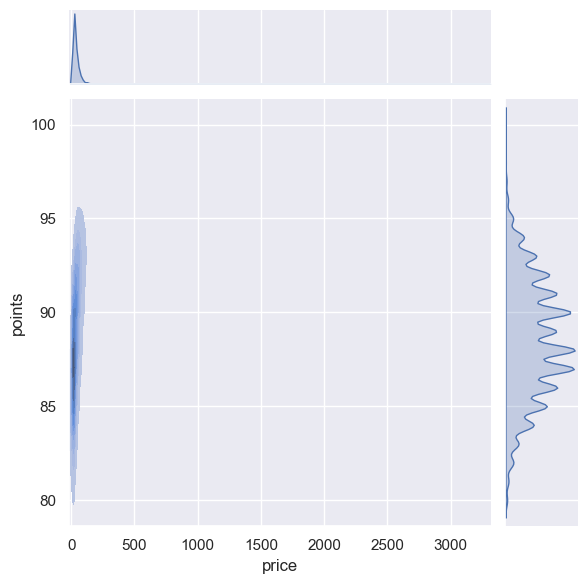

In [160]:
sns.jointplot(wine_df, x='price', y='points', kind='kde', fill=True)

In [161]:
wine_df['review_len'] = wine_df.description.str.len()
wine_df.head()



,country,description,points,price,taster_name,title,variety,winery,year,wine_style,type,quality,classification,location,band,review_len
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,Kerin O’Keefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,2013,light_white,white,medium,Old World,Etna,None,172
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2011,medium_red,red,medium,Old World,Douro,popular,227
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013,light_white,white,medium,New World,Oregon,popular,186
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013,aromatic_white,white,medium,New World,Michigan,popular,199
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012,light_red,red,medium,New World,Oregon,luxury,249


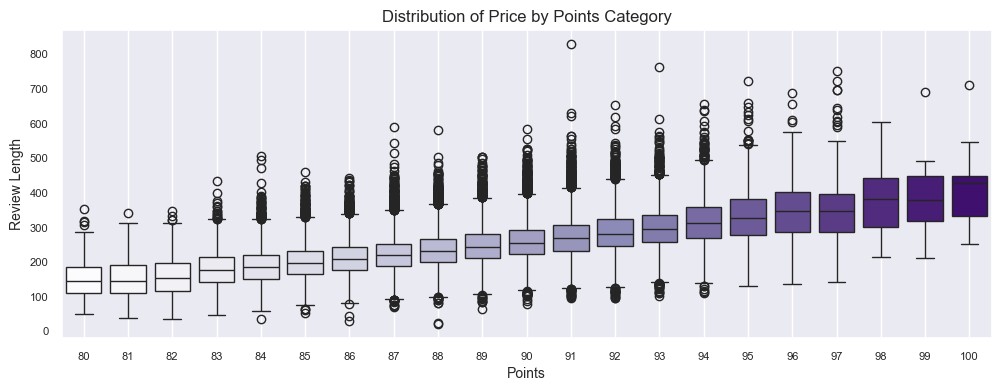

In [162]:
plt.figure(figsize=(12,4))
sns.boxplot(x = 'points', y = 'review_len', palette = 'Purples', hue='points', data = wine_df, native_scale=False, legend=None)
plt.title("Distribution of Price by Points Category", fontsize=12)
plt.xlabel("Points",fontsize=10)
plt.ylabel("Review Length",fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.grid()
plt.show()

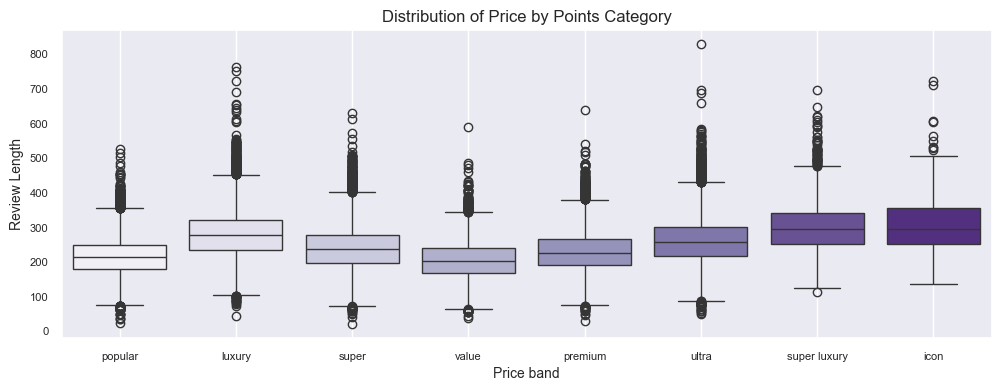

In [163]:
plt.figure(figsize=(12,4))
sns.boxplot(x = 'band', y = 'review_len', palette = 'Purples', hue='band', data = wine_df, native_scale=False, legend=None)
plt.title("Distribution of Price by Points Category", fontsize=12)
plt.xlabel("Price band",fontsize=10)
plt.ylabel("Review Length",fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.grid()
plt.show()

<Axes: xlabel='points', ylabel='country'>

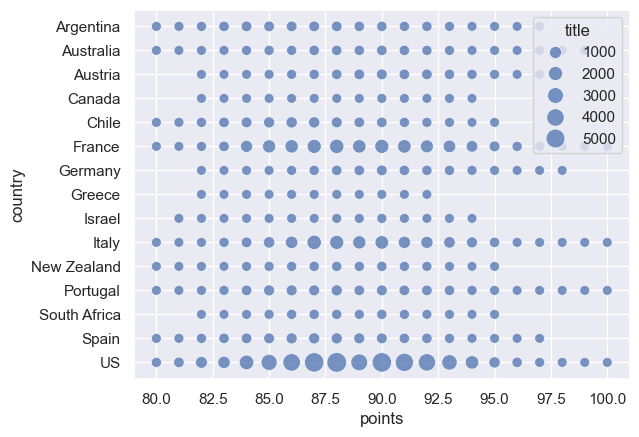

In [165]:
sns.scatterplot(wine_df.groupby(['country', 'points'])['title'].count().reset_index(), x='points', y='country', size='title', sizes=(50,200), alpha=.75)

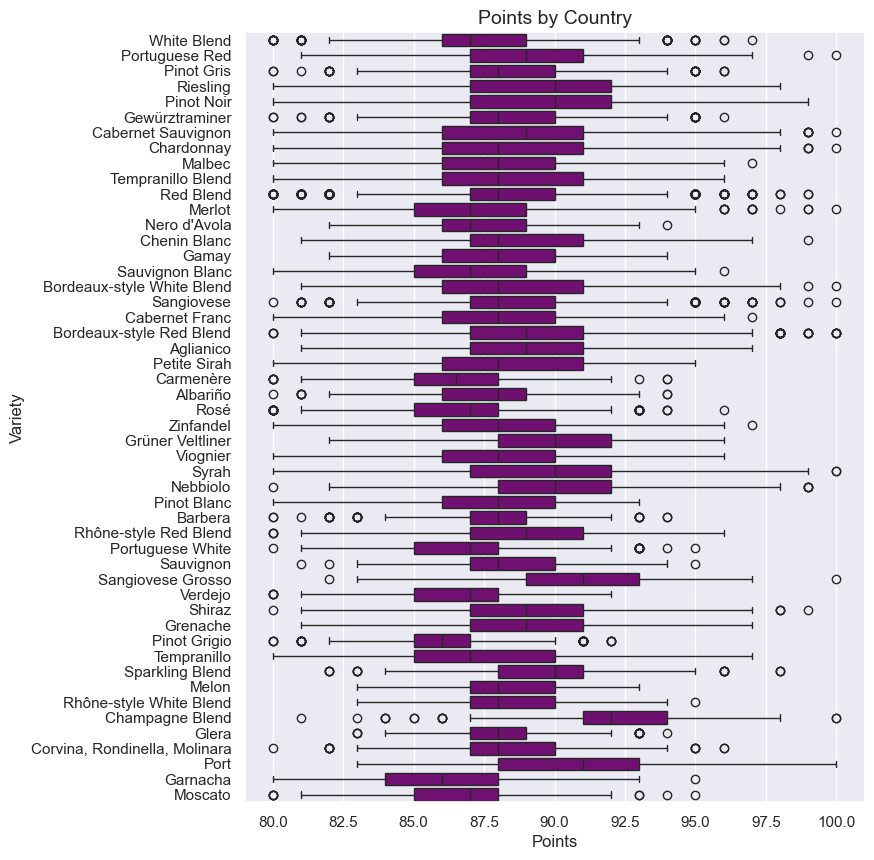

In [166]:
plt.figure(figsize=(8, 10))
sns.boxplot(data=wine_df, x='points', y='variety', color = 'Purple')
plt.title('Points by Country', fontsize = 14)
plt.xlabel('Points')
plt.ylabel('Variety');

In [171]:
by_variety = wine_df.groupby('variety').agg({'points': ['mean', 'max'],'price': ['mean', 'max'], 'title': ['count']})
by_variety.reset_index()

variety     points            price          title
                                        mean  max        mean     max  count
0                       Aglianico  89.258160   97   39.433824   180.0    337
1                        Albariño  87.717290   94   21.295775    75.0    428
2                         Barbera  87.753510   94   26.260148   100.0    641
3        Bordeaux-style Red Blend  89.147510  100   48.143238  3300.0   6386
4      Bordeaux-style White Blend  88.761375  100   36.017433  1000.0    989
5                  Cabernet Franc  88.204789   97   35.305913   180.0   1211
6              Cabernet Sauvignon  88.646615  100   48.729717   625.0   8478
7                       Carmenère  86.562500   94   21.215385   235.0    528
8                 Champagne Blend  92.038781  100  102.503311   600.0    361
9                      Chardonnay  88.328475  100   34.490166  2013.0  10360
10                   Chenin Blanc  88.645224   99   23.537961   159.0    513
11  Corvina, Rondinella, Molinara  88.191228   96   47.953540   530.0    570
12                          Gamay  88.027263   94   20.590541   224.0    917
13                       Garnacha  85.914191   95   22.483444   290.0    303
14                 Gewürztraminer  88.589882   96   26.339429   197.0    929
15                          Glera  88.166667   94   22.824034    75.0    258
16                       Grenache  89.033557   97   36.114478   230.0    596
17               Grüner Veltliner  90.003353   96   28.476285  1100.0   1193
18                         Malbec  87.984730   97   30.275222   400.0   2423
19                          Melon  88.407115   93   17.078341    80.0    253
20                         Merlot  87.207935  100   29.774879   625.0   2722
21                        Moscato  86.681818   95   18.037500    90.0    264
22                       Nebbiolo  90.326137   99   66.402978   595.0   2594
23                   Nero d'Avola  87.441358   94   23.498270    90.0    324
24                   Petite Sirah  88.126984   95   31.466763   115.0    693
25                    Pinot Blanc  87.760638   93   20.285714    80.0    376
26                   Pinot Grigio  86.199153   92   16.737486    70.0    944
27                     Pinot Gris  88.493837   96   23.178600   135.0   1298
28                     Pinot Noir  89.472805   99   48.378755  2500.0  11914
29                           Port  90.518841  100   58.650980   650.0    345
30                 Portuguese Red  88.846289  100   25.057835   450.0   2277
31               Portuguese White  86.920877   95   15.412027    95.0   1049
32                      Red Blend  88.461233   99   36.622578   500.0   7803
33          Rhône-style Red Blend  89.163313   96   34.948947   500.0   1292
34        Rhône-style White Blend  88.451282   95   32.067885   250.0    390
35                       Riesling  89.508392   98   32.658239   775.0   4707
36                           Rosé  86.799555   96   18.487661   800.0   3143
37                     Sangiovese  88.572346  100   46.079590   800.0   2336
38              Sangiovese Grosso  90.566906  100   65.347426   900.0    695
39                      Sauvignon  88.163636   95   26.547893    95.0    275
40                Sauvignon Blanc  87.413345   96   20.273214   135.0   4466
41                         Shiraz  89.132075   99   42.677198   850.0    742
42                Sparkling Blend  89.428571   98   40.401361   250.0    777
43                          Syrah  89.325086  100   39.306386   750.0   3759
44                    Tempranillo  87.491153   97   31.340123   600.0   1639
45              Tempranillo Blend  88.318519   96   36.026168   450.0    540
46                        Verdejo  86.279245   92   16.095057    50.0    265
47                       Viognier  87.696507   96   25.906077   140.0    916
48                    White Blend  87.386306   97   23.319777   375.0   1957
49                      Zinfandel  87.850550   97   30.058125   100.0   2362

<Axes: xlabel="('points', 'mean')", ylabel='variety'>

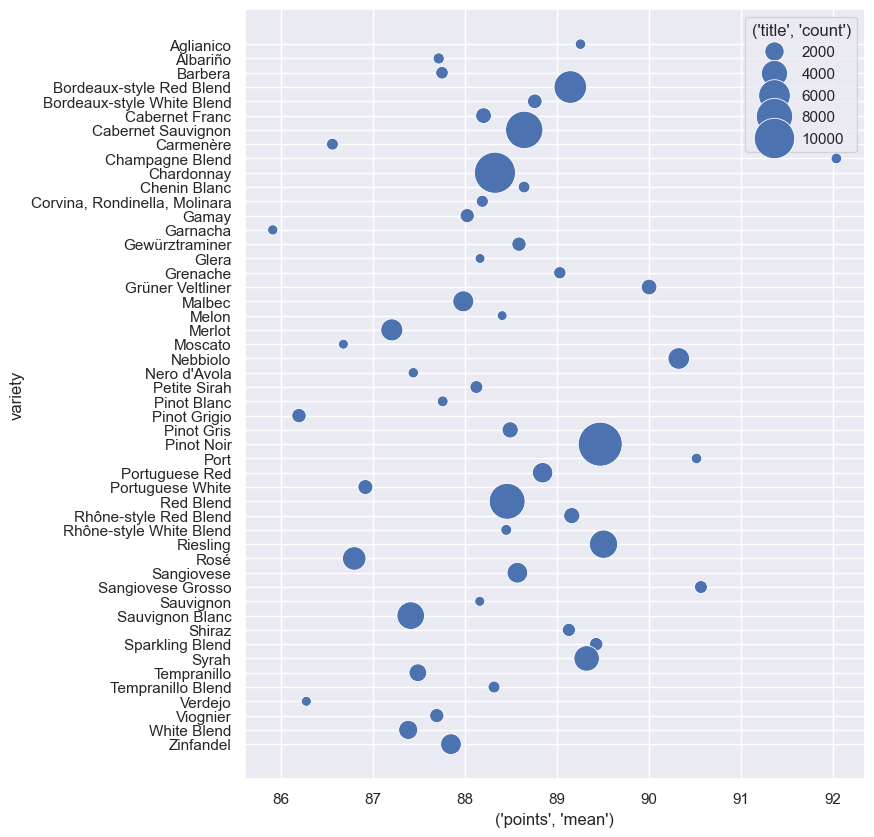

In [184]:
plt.figure(figsize=(8, 10))
sns.scatterplot(by_variety.reset_index(), x=('points','mean'), y='variety', size=('title', 'count'), sizes=(50,1000))


<Axes: xlabel="('points', 'mean')", ylabel="('price', 'mean')">

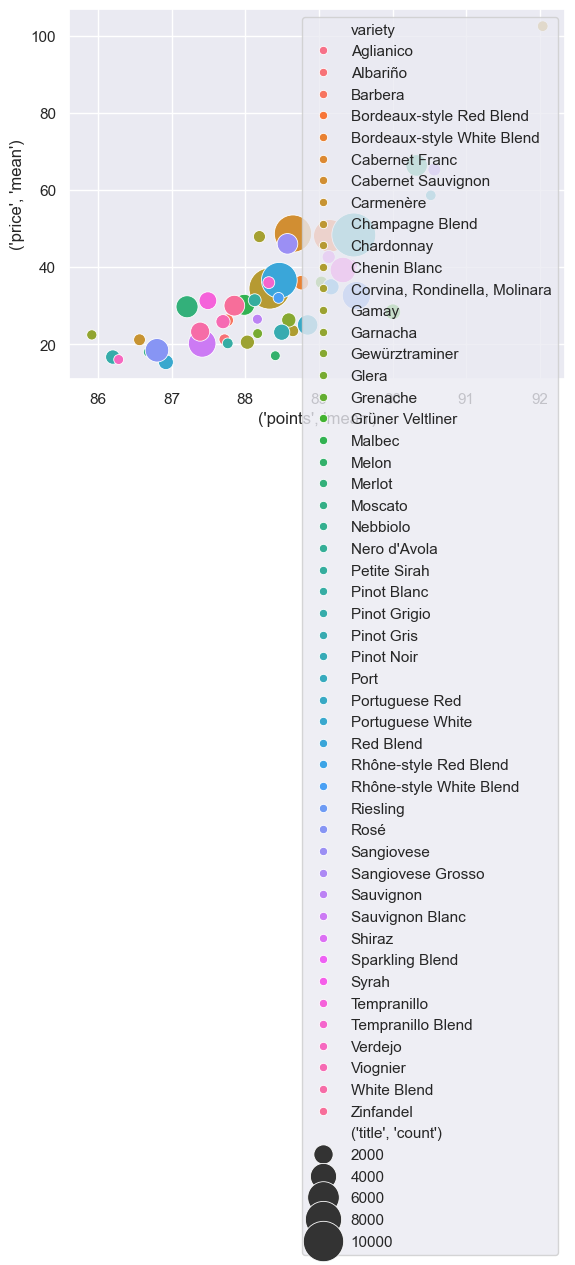

In [179]:
sns.scatterplot(by_variety.reset_index(), x=('points','mean'), y=('price', 'mean'), size=('title', 'count'), sizes=(50,1000), hue='variety')

In [193]:
by_country = wine_df.groupby('country').agg({'price': 'mean', 'points': 'mean', 'title': 'count'}).reset_index()
by_country

,country,price,points,title
0,Argentina,25.246274,86.745315,2988
1,Australia,35.851359,88.595186,1828
2,Austria,31.823690,90.373339,2183
3,Canada,33.643243,89.333333,186
4,Chile,20.604975,86.459181,3785
5,France,42.106180,88.883563,17692
6,Germany,43.848260,90.012856,1789
7,Greece,24.345029,87.080000,175
8,Israel,31.764858,88.493703,397
9,Italy,45.320693,88.940221,13115


<Axes: xlabel='price', ylabel='points'>

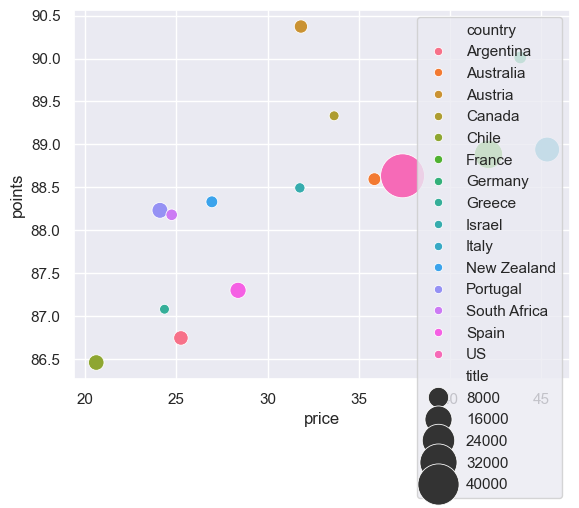

In [194]:
sns.scatterplot(by_country, x='price', y='points', size='title', sizes=(50,1000), hue='country')

In [202]:
def plot_strip(df, x, y, y_value):
  fig = plt.figure(figsize=(10,4))
  
  return df[df[y] == y_value][x].plot.density()

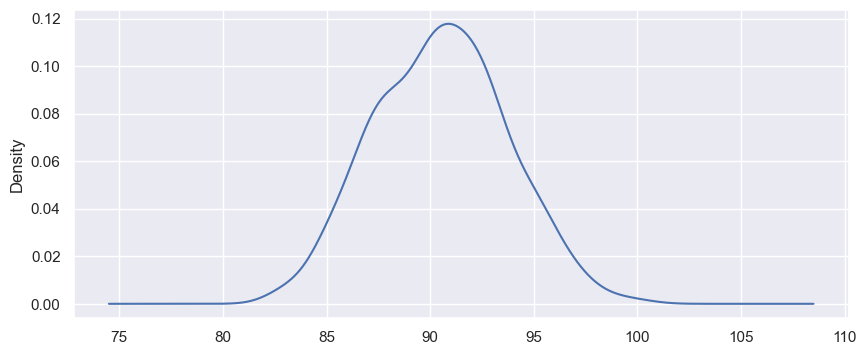

In [209]:
ax = plot_strip(wine_df, 'points', 'variety', 'Port')
plt.show()

# Next
- [NLP preprocessing](wine_review-preprocess.ipynb)